In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set()

In [2]:
df= pd.read_csv('Data_Scientist_cleaned.csv')


In [15]:
df.columns


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Min_salary', 'Max_salary', 'Avg_salary', 'Job_state',
       'Job_city', 'headquarters_city', 'Same_state_hq_jl', 'Age', 'python_jd',
       'Sql', 'aws', 'visualization', 'Project_Management', 'Excel', 'Hadoop',
       'Machine Learning', 'Ai', 'Unstructured Data', 'communication',
       'Teamwork', 'job_simplifier', 'Seniority', 'desc_len',
       'Competitors_count'],
      dtype='object')

In [7]:
def title_simplifier(title):
    if 'scientist' in title.lower():
        return 'Data Scientist'
   
    elif ' business' in title.lower():
        return 'Business analyst'
    elif 'machine' in title.lower():
        return 'Machine Learning'
    elif 'manager'in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'Director'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'quantitative' in title.lower():
        return 'quantitative analyst'
    elif 'engineer' in title.lower():
        return 'Data Engineer'
    elif 'intelligence' in title.lower():
        return 'Intelligence Analyst'
    
    elif 'operations' in title.lower():
        return 'operations analyst'
    elif 'marketing' in title.lower():
        return 'marketing analyst'
#     else :
#         return 'Na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'Junior' in title.lower() or 'junior' in title.lower():
        return 'junior'
#     else :
#         return 'na'
    

In [8]:
df['job_simplifier'] = df['Job Title'].apply(title_simplifier) 


In [9]:
df.job_simplifier.value_counts()

Data Scientist          1756
Data Engineer            765
data analyst             733
Machine Learning         121
manager                   85
quantitative analyst      73
Intelligence Analyst      62
Business analyst          28
Director                  28
Name: job_simplifier, dtype: int64

In [10]:
df['Seniority'] = df['Job Title'].apply(seniority)
df.Seniority.value_counts(dropna = False)

NaN       2961
senior     903
junior      45
Name: Seniority, dtype: int64

In [11]:
df['Job_state']= df.Job_state.apply(lambda x: x.strip() if x.strip().lower() != 'arapahoe' else 'CO')
df.Job_state.value_counts() 

TX               1253
CA               1069
IL                363
PA                324
NY                313
AZ                295
OH                177
FL                 69
NJ                 32
DE                 10
United ingdom       4
Name: Job_state, dtype: int64

In [12]:
df['desc_len'] = df['Job Description'].apply(lambda x : len(x))


In [13]:
df['Competitors_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!= -1 else 0)


In [16]:
df['Min_salary_hr']= df['Min_salary'].div(2)


In [17]:
df['Max_salary_hr']= df['Max_salary'].div(2)


In [19]:
df['avg_salary_hr'] = df['Avg_salary'].div(2)

In [20]:
df.describe()


,Unnamed: 0,Rating,Founded,Min_salary,Max_salary,Avg_salary,Same_state_hq_jl,Age,python_jd,Sql,...,Machine Learning,Ai,Unstructured Data,communication,Teamwork,desc_len,Competitors_count,Min_salary_hr,Max_salary_hr,avg_salary_hr
count,3909.000000,3909.000000,3909.000000,3909.000000,3909.000000,3909.000000,3909.000000,3909.000000,3909.000000,3909.000000,...,3909.000000,3909.000000,3909.000000,3909.000000,3909.000000,3909.000000,3909.000000,3909.000000,3909.000000,3909.000000
mean,1954.000000,3.283576,1479.154771,81.964441,135.454848,108.709644,0.311333,35.474546,0.526222,0.531338,...,0.336915,0.902277,0.076746,0.494756,0.202609,3585.173190,1.517779,40.982221,67.727424,54.354822
std,1128.575429,1.575749,855.750138,34.271166,68.938915,45.924512,0.463098,50.278673,0.499376,0.499081,...,0.472716,0.296978,0.266222,0.500036,0.401995,2025.918212,0.863512,17.135583,34.469458,22.962256
min,0.000000,-1.000000,-1.000000,1.000000,27.000000,22.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,13.500000,11.000000
25%,977.000000,3.200000,1625.000000,52.000000,97.000000,75.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,2118.000000,1.000000,26.000000,48.500000,37.500000
50%,1954.000000,3.700000,1976.000000,76.000000,129.000000,104.500000,0.000000,18.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,3317.000000,1.000000,38.000000,64.500000,52.250000
75%,2931.000000,4.100000,2002.000000,110.000000,165.000000,133.000000,1.000000,44.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,4699.000000,2.000000,55.000000,82.500000,66.500000
max,3908.000000,5.000000,2020.000000,200.000000,2026.000000,1013.500000,1.000000,395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,19876.000000,4.000000,100.000000,1013.000000,506.750000


<AxesSubplot:>

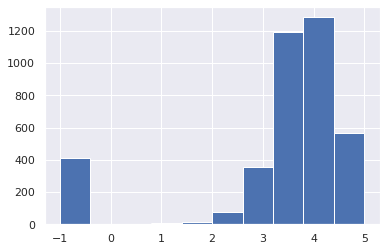

In [21]:
df.Rating.hist()

<AxesSubplot:>

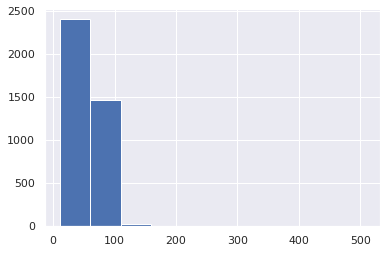

In [23]:
df.avg_salary_hr.hist()

<AxesSubplot:>

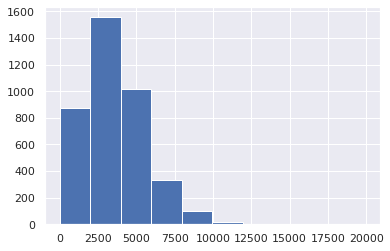

In [24]:
df.desc_len.hist()


In [25]:
df[['Age', 'avg_salary_hr', 'Rating', 'desc_len']].corr()

,Age,avg_salary_hr,Rating,desc_len
Age,1.000000,-0.031159,0.202791,0.388861
avg_salary_hr,-0.031159,1.000000,0.056473,-0.024758
Rating,0.202791,0.056473,1.000000,0.078897
desc_len,0.388861,-0.024758,0.078897,1.000000


<AxesSubplot:>

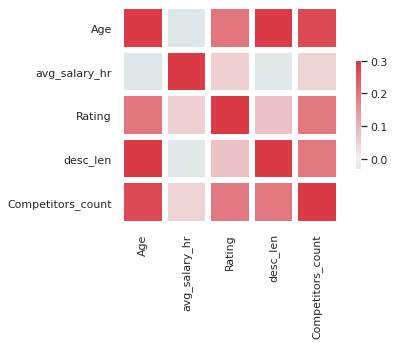

In [26]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['Age', 'avg_salary_hr', 'Rating', 'desc_len','Competitors_count']].corr(), vmax=.3, center=0, cmap=cmap,square=True, linewidth=5, cbar_kws={"shrink":.5})

In [27]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Min_salary', 'Max_salary', 'Avg_salary', 'Job_state',
       'Job_city', 'headquarters_city', 'Same_state_hq_jl', 'Age', 'python_jd',
       'Sql', 'aws', 'visualization', 'Project_Management', 'Excel', 'Hadoop',
       'Machine Learning', 'Ai', 'Unstructured Data', 'communication',
       'Teamwork', 'job_simplifier', 'Seniority', 'desc_len',
       'Competitors_count', 'Min_salary_hr', 'Max_salary_hr', 'avg_salary_hr'],
      dtype='object')

In [29]:
df_variables= df[['Location','Headquarters','Size','Type of ownership','Industry', 'Sector', 'Revenue', 'Job_state',
       'Job_city', 'headquarters_city','Same_state_hq_jl',
        'Seniority' , 'Company Name', 'python_jd',
       'Sql', 'aws', 'visualization', 'Project_Management', 'Excel', 'Hadoop',
       'Machine Learning', 'Ai', 'Unstructured Data', 'communication',
       'Teamwork', 'Competitors_count']]

graphs for Location: total= 20


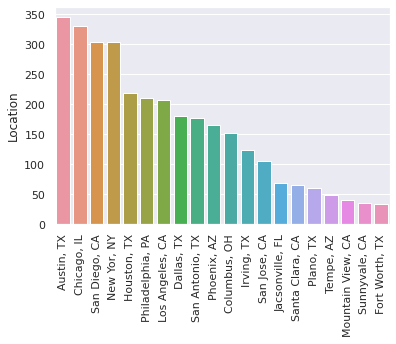

graphs for Headquarters: total= 20


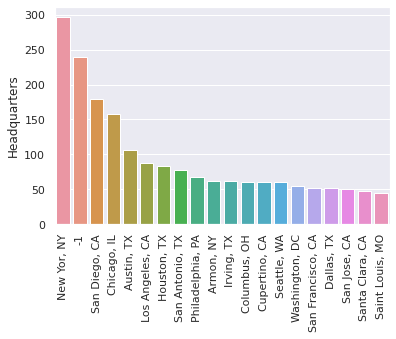

graphs for Size: total= 9


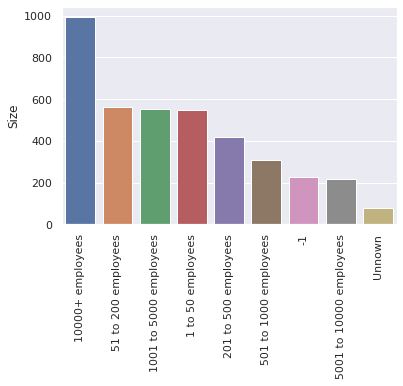

graphs for Type of ownership: total= 15


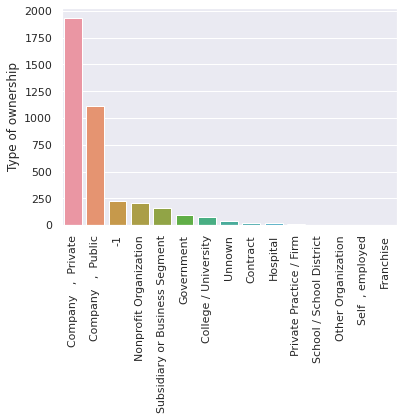

graphs for Industry: total= 20


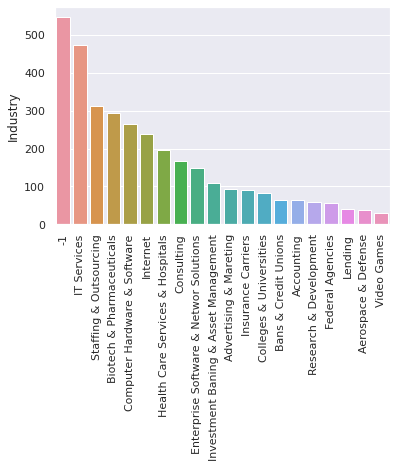

graphs for Sector: total= 20


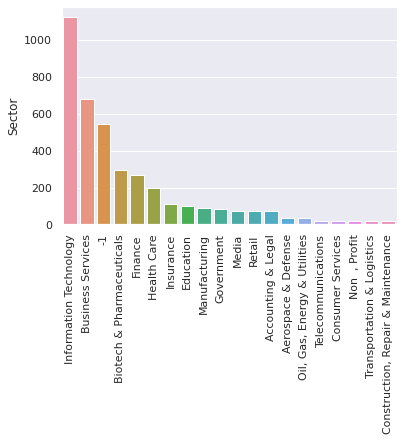

graphs for Revenue: total= 14


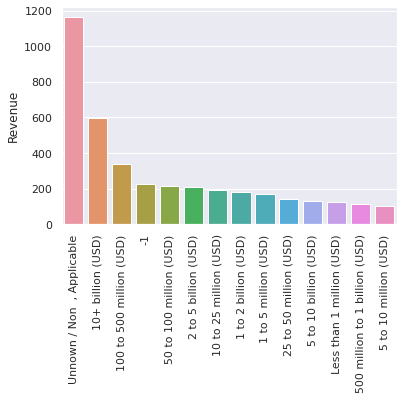

graphs for Job_state: total= 11


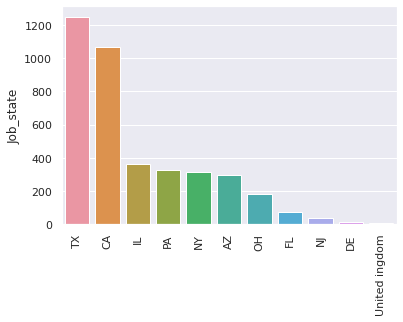

graphs for Job_city: total= 20


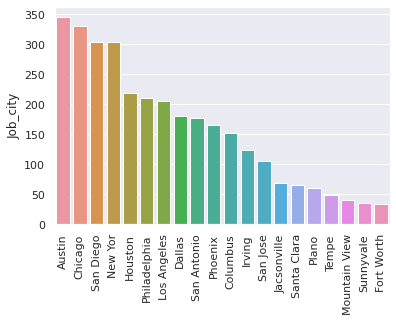

graphs for headquarters_city: total= 20


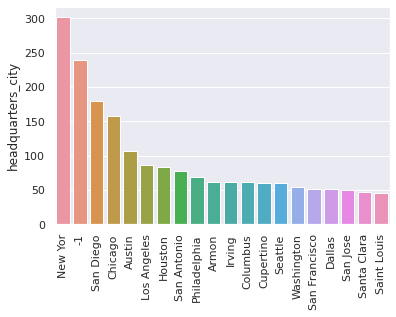

graphs for Same_state_hq_jl: total= 2


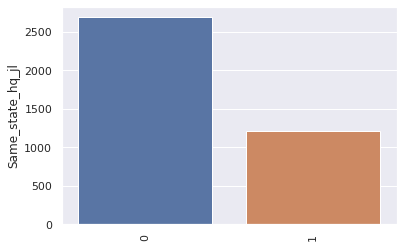

graphs for Seniority: total= 2


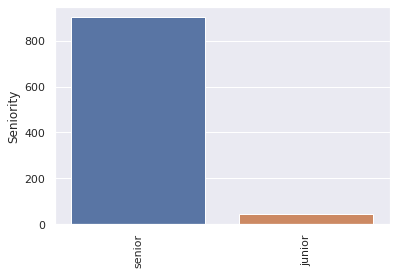

graphs for Company Name: total= 20


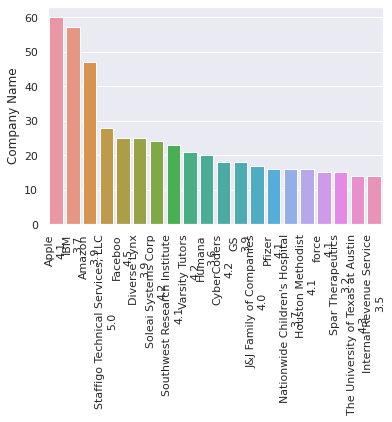

graphs for python_jd: total= 2


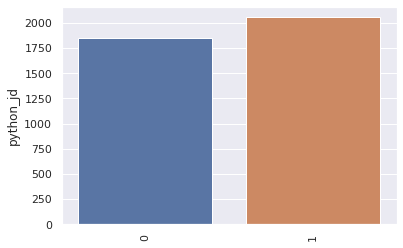

graphs for Sql: total= 2


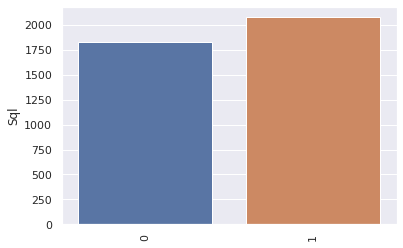

graphs for aws: total= 2


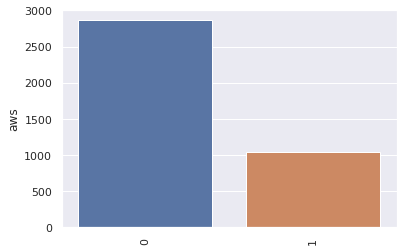

graphs for visualization: total= 2


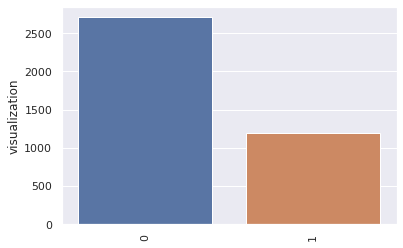

graphs for Project_Management: total= 2


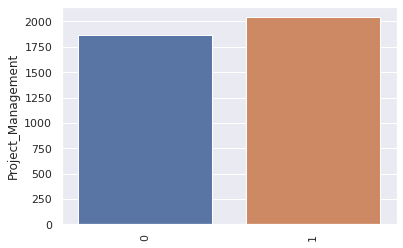

graphs for Excel: total= 2


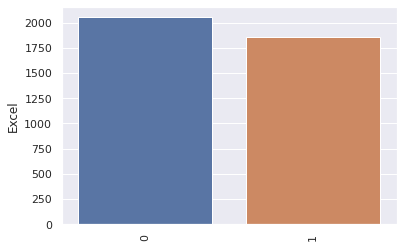

graphs for Hadoop: total= 2


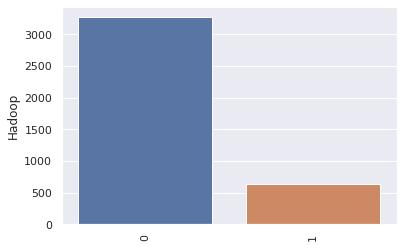

graphs for Machine Learning: total= 2


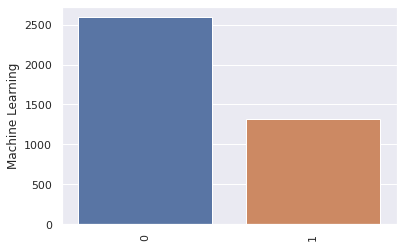

graphs for Ai: total= 2


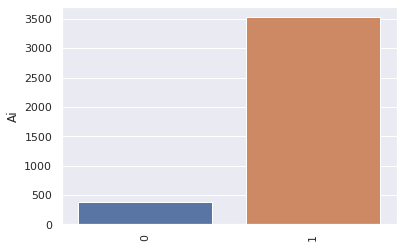

graphs for Unstructured Data: total= 2


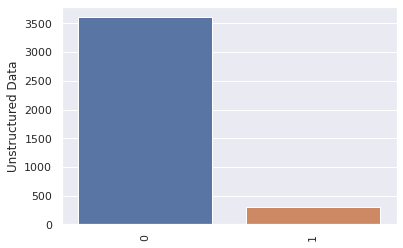

graphs for communication: total= 2


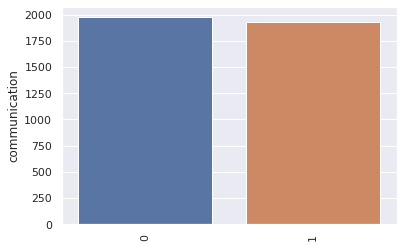

graphs for Teamwork: total= 2


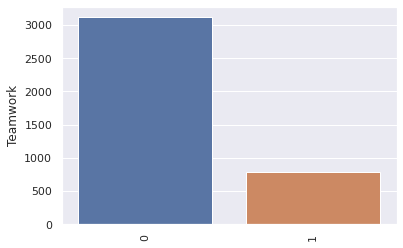

graphs for Competitors_count: total= 4


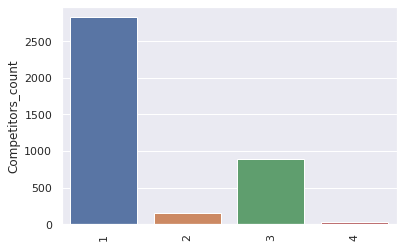

In [30]:
for i in df_variables[['Location','Headquarters','Size','Type of ownership','Industry', 'Sector', 'Revenue', 'Job_state',
       'Job_city', 'headquarters_city','Same_state_hq_jl',
        'Seniority' , 'Company Name', 'python_jd',
       'Sql', 'aws', 'visualization', 'Project_Management', 'Excel', 'Hadoop',
       'Machine Learning', 'Ai', 'Unstructured Data', 'communication',
       'Teamwork', 'Competitors_count' ]].columns:
    cat_num = df_variables[i].value_counts()[:20]
    print("graphs for %s: total= %d" % (i,len(cat_num)))
    chart= sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [32]:
pd.pivot_table(df, index=['job_simplifier','Seniority'], values='Avg_salary' )

Avg_salary
job_simplifier       Seniority            
Business analyst     junior      56.500000
                     senior      78.593750
Data Engineer        junior     105.428571
                     senior     103.770349
Data Scientist       junior     101.833333
                     senior     119.617934
Director             senior     148.666667
Intelligence Analyst senior      93.000000
Machine Learning     senior      98.300000
data analyst         junior     102.303571
                     senior     101.432203
manager              senior     114.687500
quantitative analyst senior      84.333333

In [34]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None )

pd.pivot_table(df, index=['Job_state','Job_city', 'job_simplifier'], values='Avg_salary' ).sort_values('Job_state', ascending= False)

Avg_salary
Job_state     Job_city                       job_simplifier                  
United ingdom Stevenage                      Data Scientist         66.500000
              Brentford                      data analyst          190.000000
                                             Data Scientist         75.500000
TX            Farmers Branch                 data analyst          116.000000
              Coppell                        data analyst           68.500000
              Dallas                         Business analyst       68.500000
                                             Data Engineer          78.100000
                                             Data Scientist         81.534884
                                             Director               67.750000
                                             Intelligence Analyst   86.166667
                                             Machine Learning       95.571429
                                             data analyst           91.565217
                                             manager                79.625000
                                             quantitative analyst   67.166667
              Farmers Branch                 Data Scientist         62.500000
              Fort Sam Houston               data analyst           22.000000
                                             Data Scientist         59.285714
              Coppell                        Data Engineer          61.500000
              Fort Worth                     Data Engineer          65.750000
                                             Data Scientist         93.884615
                                             Machine Learning       55.000000
                                             data analyst           86.833333
              Grand Prairie                  Data Scientist         62.000000
              Grapevine                      Data Scientist         98.500000
                                             data analyst           95.250000
              Houston                        Business analyst      113.571429
                                             Data Engineer         109.766667
                                             Data Scientist        107.114458
              Coppell                        Data Scientist         61.500000
              Carrollton                     data analyst          116.000000
              Cedar Par                      data analyst           53.500000
              Austin                         Business analyst      106.000000
              Addison                        Business analyst       87.500000
                                             Data Scientist         62.000000
                                             data analyst           65.000000
              Allen                          Data Scientist         92.000000
                                             data analyst           87.500000
              Alvin                          Data Scientist        132.500000
              Arlington                      Data Engineer          76.500000
                                             Data Scientist         93.187500
                                             Intelligence Analyst   68.500000
                                             data analyst           68.800000
                                             quantitative analyst   87.500000
              Austin                         Data Engineer          98.057692
              Houston                        Intelligence Analyst   78.600000
              Austin                         Data Scientist        114.700000
                                             Director               87.000000
                                             Intelligence Analyst  112.100000
                                             Machine Learning      108.416667
                                             data analyst          105.239437
           

In [37]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None )

pd.pivot_table(df[df.job_simplifier == 'Data Scientist'], index='Job_state', values='Avg_salary', aggfunc='count' ).sort_values('Job_state', ascending= False)

,Avg_salary
Job_state,
United ingdom,3
TX,409
PA,171
OH,88
NY,214
NJ,22
IL,141
FL,21
DE,5


In [38]:
df['Rating_groups']= pd.cut(df['Rating'], bins = [0,1,2,3,4,5])

<AxesSubplot:xlabel='Rating_groups'>

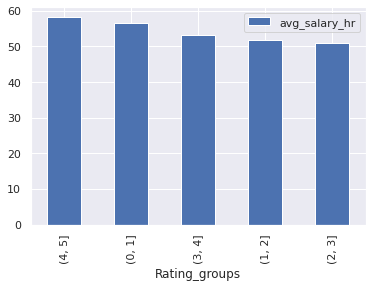

In [39]:
df.groupby(['Rating_groups'])['avg_salary_hr'].mean().reset_index().sort_values('avg_salary_hr', ascending = False).set_index('Rating_groups').plot(kind = 'bar')

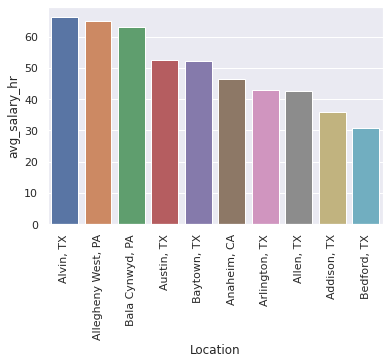

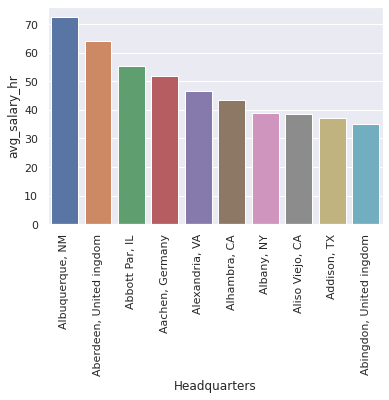

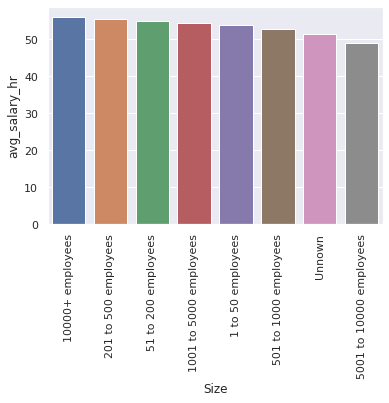

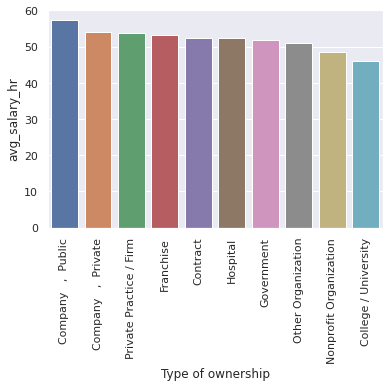

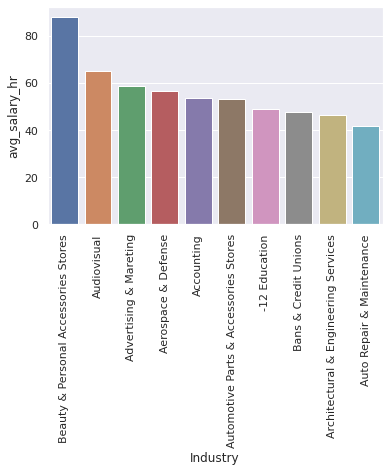

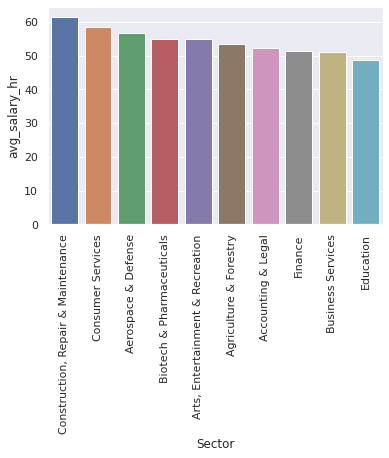

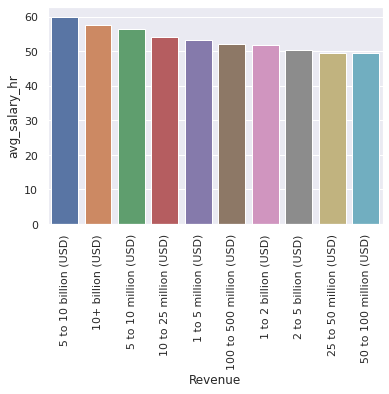

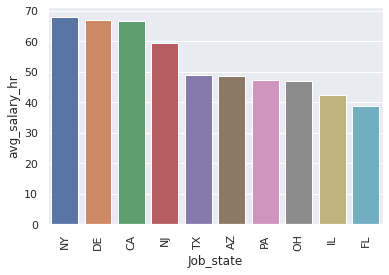

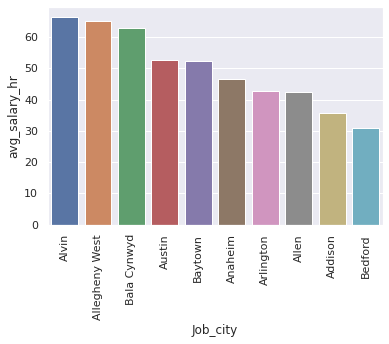

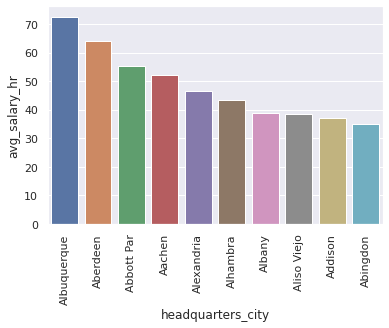

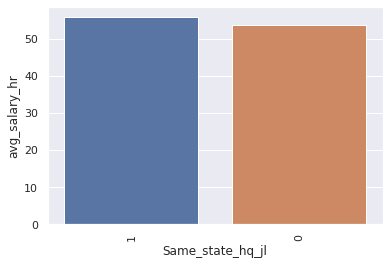

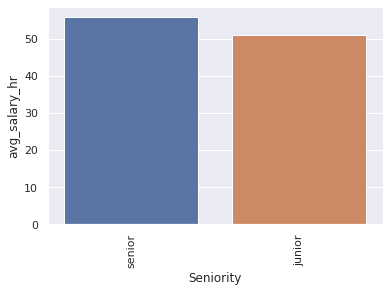

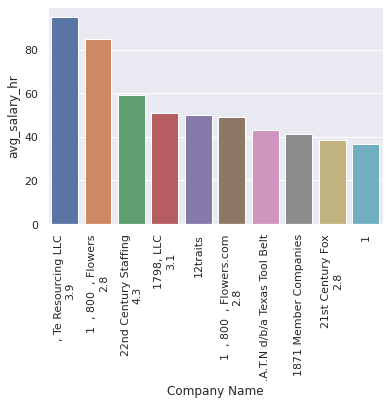

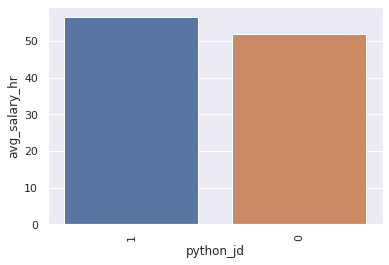

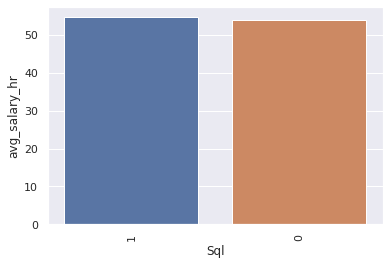

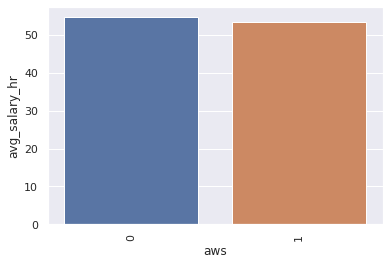

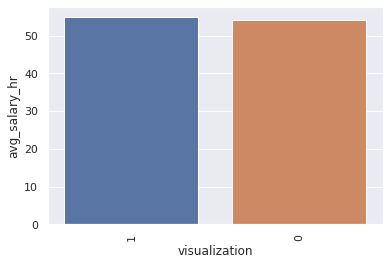

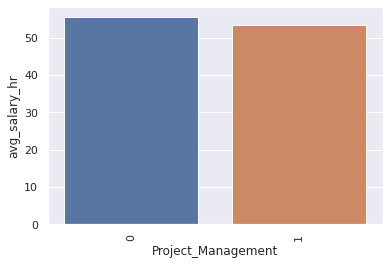

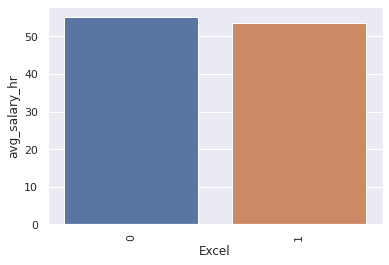

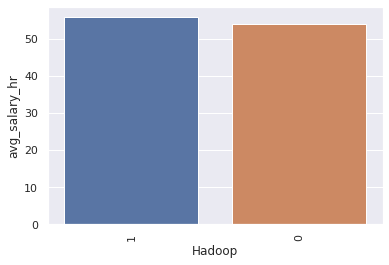

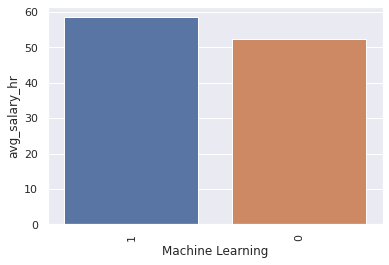

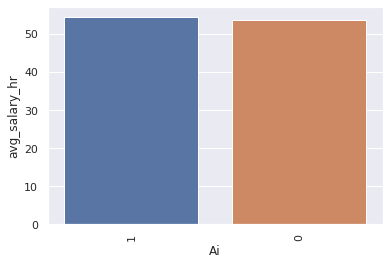

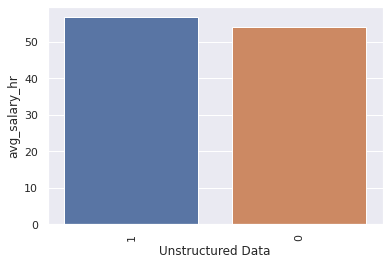

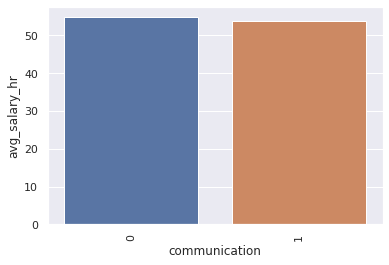

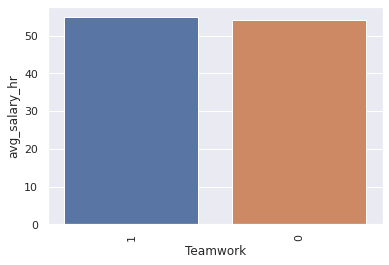

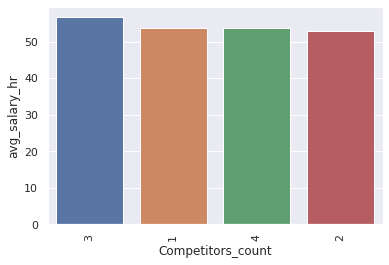

In [41]:
for i in [i for i in df_variables.columns.tolist() if i != 'avg_salary_hr']:
    k = 'avg_salary_hr'
    df_2 = df[(df[i].astype(str) != '-1')]
    chart_df = df_2.groupby([i])[k].mean().reset_index()[:10].sort_values(k, ascending = False).set_index(i)
    chart_df.index = chart_df.index.astype('str')
    chart= sns.barplot(x=chart_df.index, y=chart_df[k])
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [63]:
from wordcloud import WordCloud, ImageColorGenerator , STOPWORDS
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [64]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Min_salary', 'Max_salary', 'Avg_salary', 'Job_state',
       'Job_city', 'headquarters_city', 'Same_state_hq_jl', 'Age', 'python_jd',
       'Sql', 'aws', 'visualization', 'Project_Management', 'Excel', 'Hadoop',
       'Machine Learning', 'Ai', 'Unstructured Data', 'communication',
       'Teamwork', 'job_simplifier', 'Seniority', 'desc_len',
       'Competitors_count', 'Min_salary_hr', 'Max_salary_hr', 'avg_salary_hr',
       'Rating_groups'],
      dtype='object')

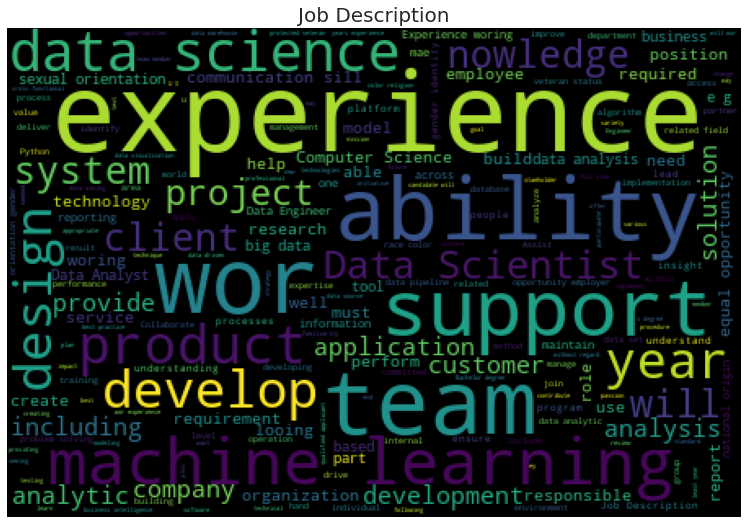

In [67]:
JobDescription=df['Job Description'][~pd.isnull(df['Job Description'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(JobDescription))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(df['Job Description'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

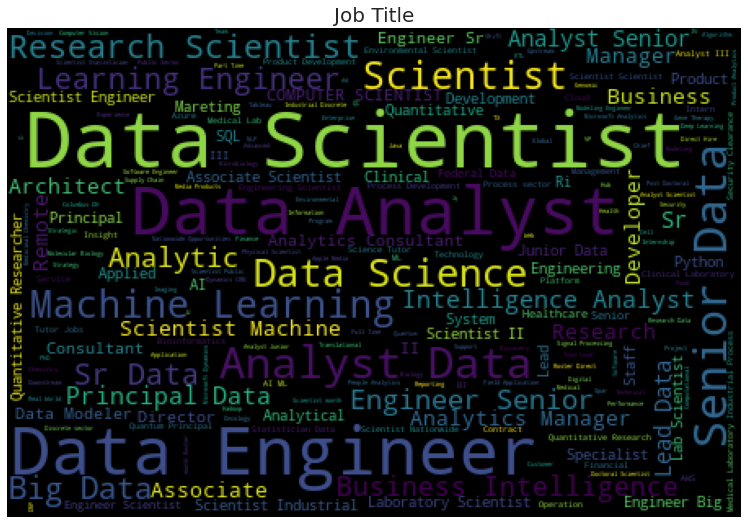

In [69]:
JobTitle=df['Job Title'][~pd.isnull(df['Job Title'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(JobTitle))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(df['Job Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

In [70]:
df.to_csv("Data_Scientist_cleaned.csv")